# Data Modeling II: Bayesian Statistics

Bayesian statistics systematically combines our prior knowledge about a situation with new data to refine what we believe is true.
In countless real-world scenarios---ranging from medical diagnostics to fundamental physics experiments---information we already have (like the rarity of a disease or theoretical constraints on a physical parameter) can significantly shape how we interpret fresh evidence.
By framing unknowns as probability distributions, Bayesian methods provide a coherent framework for updating those distributions whenever new observations appear, yielding a posterior that reflects all evidence, old and new.
This unifying perspective makes it possible to quantify uncertainties in a transparent way, avoid common logical pitfalls, and naturally propagate errors to any derived quantities of interest.

## Medical Test "Paradox"

The medical test paradox occurs when a diagnostic test is described as highly accurate, yet a person who tests positive for a rare disease ends up with a much lower chance of actually having it.
This seemingly contradiction highlights the importance of prior knowledge or base rates.

Consider a disease that affects only 1% of the population.
Imagine a test that has:
* 99% sensitivity: if you **do** have the disease, it flags you positive 99% of the time.
* 99% specificity: if you **do not** have the disease, it correctly flags you negative 99% of the time.

Many people assume that a "99% accurate" test implies a 99% chance of having the disease if you test positive.
We will see that is not necessarily true when the disease is rare.

### A Simple Counting Argument

Suppose we have 10,000 people.
About 100 of them are diseased (1%).
The remaining 9,900 are healthy.  

Of the 100 diseased people, 99 will test positive (true positives).
Of the 9,900 healthy people, 1% will falsely test positive (99 people).
We end up with a total of 198 positive results: 99 true positives plus 99 false positives.

Hence, only half of these positives (99 out of 198) are truly diseased.
This implies a 50% chance of actually having the disease, which is far lower than 99%.

### Why This Happens

When a condition is rare, most people do not have it.
A small fraction of a large healthy group (the 1% false-positive rate applied to 9,900 healthy people) can match or exceed the positives from the much smaller diseased group.
This is a direct consequence of prior probability: we have to weigh how common the disease is before we interpret a new test result.

## An Intuitive Derivation of Bayes' Theorem

Bayes' Theorem emerges directly from the definition of **conditional probability**.
We start with $P(A \mid B)$, which is read as "the probability of $A$ given that $B$ occurred."
By definition, this is the fraction of times both $A$ and $B$ happen, out of all times $B$ happens:
\begin{align}
P(A \mid B) = \frac{P(A \cap B)}{P(B)}.
\end{align}

Here, $P(A \cap B)$ is the joint probability that both events occur.
We can also express this joint probability in another way:
\begin{align}
P(A \cap B) = P(B \mid A)\,P(A).
\end{align}

Placing this back into our conditional probability formula gives:
\begin{align}
P(A \mid B)
= \frac{P(B \mid A)\,P(A)}{P(B)}.
\end{align}

We can split $B$ into two disjoint groups:
\begin{align}
P(B) = P(B \mid A)\,P(A) \;+\; P(B \mid \bar{A})\,P(\bar{A}).
\end{align}

Putting this altogether yields **Bayes' Theorem**:
\begin{align}
P(A \mid B)
= \frac{P(B \mid A)\,P(A)}
       {P(B \mid A)\,P(A) \;+\; P(B \mid \bar{A})\,P(\bar{A})}.
\end{align}

We can connect each term to our **medical test paradox**. In that story:
* $P(A)$ is the **prevalence** (1%).
* $P(\bar{A})$ is the chance of not having the disease (99%).
* $P(B \mid A)$ is the **sensitivity** (99%).
* $P(B \mid \bar{A})$ is the **false-positive rate** (1%).

When we substitute these numbers, we match the counting argument that led to a final probability of around 50% if you test positive.
This result might seem surprising at first, but it follows naturally once we include both the **base rate** of the disease and the test's **accuracy**.
Bayes' Theorem thus formalizes the intuition behind "counting true positives vs. false positives" and ensures we do not overlook the large fraction of healthy individuals in the population.

This same line of reasoning applies to many physics and data-modeling scenarios.
We often start with a **prior** for a parameter (like the prevalence in the medical example) and then update it with **likelihood** information from new observations.
Bayes' Theorem tells us how to combine both pieces of information in a consistent way, yielding a **posterior probability** that captures our updated understanding of the system.

### Why Bayes' Theorem Matters

The key power of Bayes' Theorem is that it forces us to incorporate the **prior probability** $P(A)$ before we look at new evidence $B$.
Once the data (test results) come in, we use the likelihood $P(B \mid A)$ to update this prior, producing the **posterior probability** $P(A \mid B)$.
In the medical context, the "update" reveals how a single test result against a low prevalence might not be enough for a confident diagnosis.

## A Physically Motivated Example: Exoplanet Detection

We can adapt the logic from the medical test paradox to a physics or astronomy problem.
Consider exoplanet detection: we look for a slight dip in a star's brightness that could signify a planet passing in front of the star (a "transit").
Even if our detection algorithm is "99% accurate," it may trigger many **false alarms** due to noise or stellar variability.
If only a small fraction of stars have detectable planets, we face a scenario similar to the medical test paradox.

### Setup

1. **Prevalence (Prior):** Suppose only **1%** of stars in our survey have a planet large enough (and orbit aligned just right) to cause a detectable transit.
2. **Detection Sensitivity:** If a star truly has a planet, our detection pipeline correctly flags it **99%** of the time.
3. **False Alarm Rate:** If a star does **not** have a planet, the pipeline still flags a **false positive** **1%** of the time (perhaps due to random noise, starspots, or measurement artifacts).

These numbers mirror the "disease prevalence" and "test sensitivity" from the medical example.
We want to know the **posterior probability** that a star truly has a planet given that we have detected a "transit signal."

### Bayes' Theorem for Exoplanets

Let:
* $A$ = "Star has a detectable planet."
* $B$ = "Detection algorithm flags a transit."

By Bayes' Theorem,
\begin{align}
P(\text{Star has planet} \,\mid\, \text{Transit Flag}) =
\frac{P(\text{Transit Flag} \,\mid\, \text{Star has planet}) \times P(\text{Star has planet})}{P(\text{Transit Flag})}.
\end{align}

Here:
1. $P(\text{Star has planet})$ is the 1% prevalence (prior).
2. $P(\text{Transit Flag} \,\mid\, \text{Star has planet})$ is the 99% detection sensitivity.
3. $P(\text{Transit Flag})$ accounts for both real transits and false alarms.

Just like in the medical paradox, we expect the **posterior probability** of having a planet given a positive detection to be around **50%**, not 99%. The rarity (1% prevalence) dilutes the significance of a single positive detection.

In [17]:
# Number of stars in the survey
N_stars = 100_000

# Prior: fraction of stars with a detectably transiting planet
planet_prevalence = 0.01

# Detection sensitivity: P(flagged transit | planet)
detection_sensitivity = 0.99

# False alarm rate: P(flagged transit | no planet) = 1 - specificity
false_alarm_rate = 0.01

In [18]:
from random import random

# Simulate which stars have planets
stars_have_planet = [
    random() < planet_prevalence
    for _ in range(N_stars)
]

In [19]:
# Simulate detection outcomes
flags = []
for has_planet in stars_have_planet:
    if has_planet:
        # Real transit flagged with probability = detection_sensitivity
        flag = random() < detection_sensitivity
    else:
        # False alarm with probability = false_alarm_rate
        flag = random() < false_alarm_rate
    flags.append(flag)

In [20]:
# Count how many flagged
flagged_count = sum(flags)

# Count how many flagged stars actually have planets
true_planet_count = sum(
    has_planet and flagged 
    for has_planet, flagged in zip(stars_have_planet, flags)
)

In [21]:
print(f"Out of {N_stars} stars, {flagged_count} were flagged.")
if flagged_count > 0:
    posterior_prob = true_planet_count / flagged_count
    print(f"Among flagged stars, {true_planet_count} truly have planets.")
    print(f"Posterior probability of having a planet if flagged: "
          f"{posterior_prob:.2f}")
else:
    print("No transits flagged (very unlikely with these settings)!")

Out of 100000 stars, 1917 were flagged.
Among flagged stars, 974 truly have planets.
Posterior probability of having a planet if flagged: 0.51


```{exercise}
Adjust the different parameters and check if the results follow your intuition.
```

## The Monty Hall Problem Through a Bayesian Lens

The Monty Hall problem is a classic puzzle that highlights how new information can dramatically change our probabilities.
Traditionally, you face three doors: one has a prize (car), the others have goats.
You pick one door.
Monty Hall, who knows where the prize is, then opens a different door that does not contain the prize.
The question is: Should you switch to the remaining unopened door, or stick with your original choice?

A Bayesian perspective clarifies why switching is advantageous.
We start with a uniform prior: the probability that the prize is behind any given door is $1/3$.
Once Monty opens a door that is guaranteed to reveal a goat (i.e., no prize), we update those prior probabilities into a posterior distribution that heavily favors the remaining door.

### Prior Probabilities

Label the doors $A, B, C$. Suppose you choose door $A$.
Initially, there is a:
* $1/3$ chance the prize is behind $A$.
* $1/3$ chance the prize is behind $B$.
* $1/3$ chance the prize is behind $C$.

These are our **prior** probabilities.
No extra information is known.

### Likelihood of Monty\end{align}s Action

Monty will open a door (say door $B$ or $C$), revealing no prize.
Monty knows where the prize is and **never** opens a door that has the prize.
He also does **not** open your chosen door $A$.

We define the event $M_B$ as "Monty opens door $B$."
From a Bayesian viewpoint, the likelihood $P(M_B \mid \text{Prize behind } X)$ is the probability that Monty opens $B$ **given** the actual location of the prize is $X$.
For example:

1. If the prize is behind $A$, Monty is **free** to open either $B$ or $C$ (each with 50% probability, because both are goats). So:
   \begin{align}
   P(M_B \mid \text{prize behind } A) = \frac{1}{2}.
   \end{align}

2. If the prize is behind $B$, Monty **never** opens $B$. So:
   \begin{align}
   P(M_B \mid \text{prize behind } B) = 0.
   \end{align}

3. If the prize is behind $C$, Monty **must** open $B$, because $A$ is your choice and $C$ has the prize. So:
   \begin{align}
   P(M_B \mid \text{prize behind } C) = 1.
   \end{align}

### Posterior Probability via Bayes' Theorem

We observe $M_B$ (Monty opened door $B$), which shows a goat.
We update the probability that the prize is behind either $A$ or $C$ using Bayes' Theorem.
Let $X$ be the event "Prize behind $X$."
\begin{align}
P(\text{prize behind } A \mid M_B)
= \frac{P(M_B \mid \text{prize behind } A)\, P(\text{prize behind } A)}{P(M_B)}.
\end{align}

Similarly for door $C$:
\begin{align}
P(\text{prize behind } C \mid M_B)
= \frac{P(M_B \mid \text{prize behind } C)\, P(\text{prize behind } C)}{P(M_B)}.
\end{align}


We first compute $P(M_B)$ by summing over all ways Monty might open $B$:
\begin{align}
P(M_B)
= P(M_B \mid \text{prize behind } A)\,P(\text{prize behind } A)
+ P(M_B \mid \text{prize behind } B)\,P(\text{prize behind } B)
+ P(M_B \mid \text{prize behind } C)\,P(\text{prize behind } C).
\end{align}

Substitute the known probabilities:
\begin{align}
P(M_B) 
&= \tfrac12 \times \tfrac13 + 0 \times \tfrac13 + 1 \times \tfrac13 \\
&= \tfrac{1}{6} + 0 + \tfrac{1}{3} 
= \tfrac{1}{6} + \tfrac{2}{6}
= \tfrac{3}{6}
= \tfrac12.
\end{align}

Now plug back into Bayes' formula:

\begin{align}
P(\text{prize behind } A \mid M_B)
&= \frac{\tfrac12 \times \tfrac13}{\tfrac12}
= \frac{\tfrac{1}{6}}{\tfrac12}
= \frac{1}{3} \\
P(\text{prize behind } C \mid M_B)
&= \frac{1 \times \tfrac13}{\tfrac12}
= \frac{\tfrac{1}{3}}{\tfrac12}
= \frac{2}{3}.
\end{align}

So, given that Monty opened $B$, the probability the prize lies behind $A$ remains **$1/3$**, while the probability it lies behind $C$ rises to $2/3$.

### Outcome: Switching is Better

The Bayesian calculation shows that, after Monty opens a non-prize door $B$, door $C$ now carries twice the probability of having the car ($2/3$) compared to door $A$ ($1/3$).
Bayesian reasoning makes the role of Monty's knowledge and purposeful action explicit: his choice to reveal a goat is *not* random and thus modifies your posterior probability distribution.

In [22]:
from random import choice

N = 100_000
switch_wins = 0

for _ in range(N):
    # Randomly choose the door with the prize
    prize_door = choice(['A','B','C'])
    # You pick door A
    your_choice = 'A'
    
    # Monty opens a door that has a goat and isn't your choice
    # Let's see which doors are available to Monty
    doors_left_for_monty = ['A','B','C']
    doors_left_for_monty.remove(your_choice)
    
    # He won't open the prize door
    if prize_door in doors_left_for_monty:
        doors_left_for_monty.remove(prize_door)
    
    # Now Monty picks randomly from the remaining goats if more than one is possible
    monty_opens = choice(doors_left_for_monty)
    
    # The other unopened door after Monty is:
    doors_unopened = ['A','B','C']
    doors_unopened.remove(your_choice)
    doors_unopened.remove(monty_opens)
    
    # This is the door you'd switch to
    switched_door = doors_unopened[0]
    
    # Check if switching wins
    if switched_door == prize_door:
        switch_wins += 1

print(f"Switching success rate: {switch_wins / N:.3f}")

Switching success rate: 0.667


### Why Bayesian Reasoning Helps

In the Monty Hall puzzle, Monty's knowledge is crucial.
He does not randomly open a door; he always opens a door with a goat.
Bayesian updates naturally encode the fact that Monty's behavior provides you information.
If Monty had opened a door randomly and happened to reveal a goat, that would yield a very different likelihood function and hence a different posterior.
But given Monty's consistent, informed strategy, the posterior probability shifts from $(1/3,1/3,1/3)$ to $(1/3, 0, 2/3)$ for $(A, B, C)$ once door $B$ is shown to have no prize.

By showing how the prior (1/3 for each door) is updated by Monty's action (likelihood depends on where the prize is and which door he opens), Bayes' Theorem makes the final distribution (1/3 vs. 2/3) transparent.
This is precisely the essence of Bayesian inference: we begin with uniform probabilities, incorporate new evidence, and end up with a posterior distribution that strongly favors the door Monty did not open.

```{exercise}
What happens if we increse the number of doors to $N$, and Monty Hall still opens one door with a goat?
Should we switch in such a case?
What is the winning probability if we switch?

What happens if we increse the number of doors to $N$, and Monty Hall opens $N-2$ door with a goat?
Should we switch in such a case?
What is the winning probability if we switch?

You may think through this, or modify the above code to simulate it.
```

## Example: Estimating the Mass of a New Fundamental Particle

In high-energy physics, discovering or characterizing a new particle often boils down to measuring its mass (alongside other properties like spin or decay channels).
Particle masses are typically extracted from observed signatures in a detector, such as energy peaks or invariant-mass distributions of decay products.
Bayesian methods are increasingly used to combine "priors" (e.g., theoretical constraints, previous measurments) with "likelihood" (collision data) to infer a posterior distribution for the unknown mass.

Below is a simplified illustration that mirrors our earlier continuous examples but sets the context in particle physics.

### Physical Picture

Suppose theorists predict a new fundamental particle with a mass in the range of 2 to 5 TeV.
We carry out an experiment in a large collider and measure an invariant mass peak from the particle's decay products.
However, our measurement is noisy and uncertain due to detector resolution, background events, etc.
Let:
* $m_\text{true}$ = the particle's (unknown) true mass (in TeV).
* $m_\text{obs}$ = the observed peak from our measurement (in TeV).

We assume a **Gaussian** error model for simplicity:
\begin{align}
m_{\text{obs}} \sim \mathcal{N}(m_\text{true}, \sigma_\text{expr}^2),
\end{align}
where $\sigma_\text{expr}$ represents the *typical detector resolution* or *statistical uncertainty* in reconstructing the mass peak.

### Prior on the Particle's Mass

We might have a **theoretical prior** stating that $m$ lies between 2 and 8 TeV, with no strong preference within that range.
That leads to a **uniform prior**:
\begin{align}
p(m) = 
\begin{cases}
1/(8 - 2), & 2 \le m \le 8, \\
0, & \text{otherwise}.
\end{cases}
\end{align}
In a real analysis, the prior might come from previous measurements/constraints like electroweak measurements or indirect searches, but a uniform prior is a straightforward starting point.

### Likelihood of Observed Data

If the measured peak is $m_\text{obs}=3.6$ TeV with an uncertainty $\sigma_\text{expr}=1.0$ TeV, the **likelihood** function is:
\begin{align}
p(m_{\text{obs}} \mid m) = \frac{1}{\sqrt{2\pi}\,\sigma_\text{expr}} \exp\left[-\frac{(m_{\text{obs}}-m)^2}{2\sigma_\text{expr}^2}\right].
\end{align}

This function is large if $m$ is near 3.6 TeV and small if $m$ is far from 3.6 TeV.

### Posterior Distribution

Bayes' Theorem states:
\begin{align}
p(m \mid m_{\text{obs}}) \propto p(m_{\text{obs}} \mid m) \, p(m).
\end{align}

We then normalize the right-hand side to ensure the posterior integrates to 1 over $m \in [2,8]$.

### Python Demo: Simple Grid Approximation

Below is a small Python code that illustrates how to compute the posterior distribution by sampling $m$ on a grid from 2 to 8 TeV:

In [23]:
import numpy as np
import matplotlib.pyplot as plt

In [24]:
# Observed mass peak (TeV) and estimated detector resolution (TeV)
m_true     = 3.6
m_obs      = 4.1  # doesn't have to be identical to m_true
sigma_expr = 1.0

In [25]:
# Define range for m (0 to 10 TeV)
ms = np.linspace(0, 10, 1001)

# Uniform prior in [2, 8]
def prior0(ms, m_min=2, m_max=8):
    # Uniform in [2,8], zero outside
    return np.where((m_min <= ms) & (ms <= m_max), 1/(m_max-m_min), 0)

# Compute prior
prior = prior0(ms)

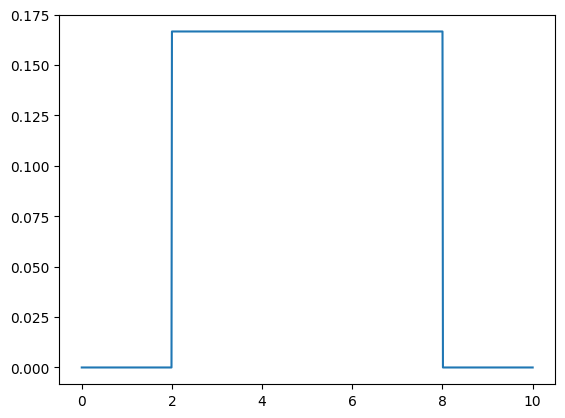

In [26]:
plt.plot(ms,prior)

In [28]:
# Gaussian likelihood
def likelihood(x, x0, sigma):
    norm = 1.0 / (np.sqrt(2*np.pi) * sigma)
    return norm * np.exp(-0.5 * ((x-x0) / sigma)**2)

# Compute likelihood
like = likelihood(m_obs, ms, sigma_expr)

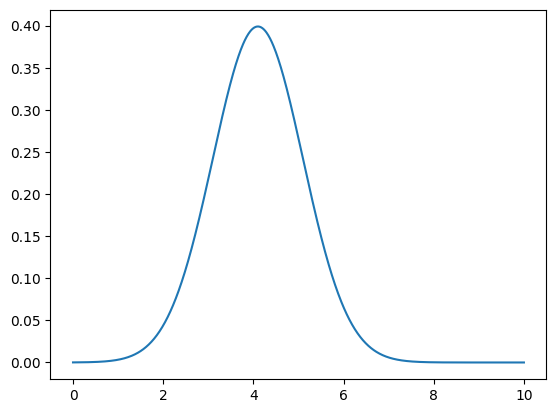

In [29]:
plt.plot(ms,like)

In [30]:
# Posterior ~ prior * likelihood

unnorm_post = like * prior
norm = 1 / np.trapezoid(unnorm_post, ms)
post = norm * unnorm_post

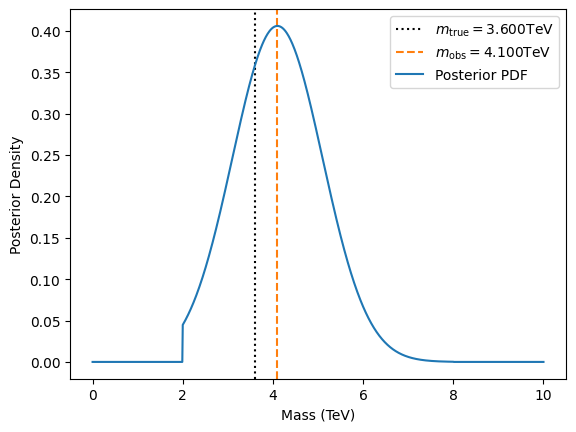

In [31]:
# Plot the posterior

plt.axvline(m_true, ls=':',  color='k',  label=r"$m_\text{true}="+f"{m_true:.3f}$TeV")
plt.axvline(m_obs,  ls='--', color='C1', label=r"$m_\text{obs}= "+f"{m_obs:.3f}$TeV")
plt.plot(ms, post, label="Posterior PDF")
plt.xlabel("Mass (TeV)")
plt.ylabel("Posterior Density")
plt.legend()

When you run this script, you see a posterior distribution peaked near 4.1 TeV.
The width of the posterior depends on $\sigma_\text{expr}$ and also how close 3.6 TeV is to the edges (2 or 8 TeV).
If the measured value were near the boundary (e.g., 2.1 TeV), the posterior might be truncated heavily on one side.

### Interpretation

In this simplified scenario:
1. The prior indicates that $m$ should lie somewhere between 2 and 8 TeV.
2. The likelihood becomes sharper if our detector resolution is good (small $\sigma_\text{expr}$).
3. The posterior is effectively a constrained, "truncated" Gaussian centered near the observed peak, but strictly between 2 and 8 TeV.

In reality, measuring a new particle mass typically involves many events rather than a single measurement.
We would accumulate data from multiple collisions, each with some measured mass or energy distribution.
The Bayesian approach, however, remains the same: start with a prior (theoretical constraints), define the likelihood (the probability of observing the data given a hypothesized mass), and compute the posterior distribution over $m$.
(See the lab.)

```{exercise}
Adjust the different parameters and check if the results follow your intuition.
```

## Error Propagation

In many experiments, we want to determine **physical properties** that are not directly measurable.
Instead, we rely on related **measured parameters** that each come with their own uncertainties.
For example, in high‐energy or nuclear physics experiments, we might measure a particle's track curvature $c$ in a magnetic field $B$ together with velocity $v$, then use those data to infer the particle's **charge** $q$ and/or **mass** $m$.
The measurements of curvature and velocity can be correlated, and each has its own uncertainty contribution. 

We often want to go further and compute **derived quantities** like the ratio $m/q$, the total energy $E \approx mc^2$, or other combinations of $(m,q)$.
Error propagation in these scenarios must carefully account for both the **magnitude** of each uncertainty and any **correlation** between parameters.

In a **Bayesian** approach, once we have a **joint posterior** over $(m,q)$, pushing those uncertainties through any function $g(m,q)$ is straightforward: we evaluate $g$ at each posterior sample.
This avoids the complexities of algebraic propagation or linearizing the function at a single point estimate, which can be challenging for strongly **nonlinear** relationships or highly **correlated** parameters.

Below is a **toy example** demonstrating **two** practical methods for error propagation in a two-parameter setting:
1. The **partial‐derivative (frequentist) approach** with a covariance matrix.
2. The **Bayesian sampling approach**, which uses posterior samples (or any Monte Carlo sample) for $(m,q)$, directly yielding a distribution for $g(m,q)$.

### Example Setup

Let's imagine a particle in a magnetic field $B$.
We measure:
* **Track curvature** $c$ (with uncertainty $\sigma_c$).
* **Velocity** $v$ (with uncertainty $\sigma_v$).

We want to infer the **charge** $q$ and **mass** $m$ of the particle.
A simplified relationship might be:
\begin{align}
c = \frac{q\,B}{m\,v},
\end{align}
assuming a non‐relativistic regime.
In a real experiment, multiple data points (and possibly more parameters) would be used, but we'll stick to a single observation to keep the demonstration concise.

**Derived Quantity**: Suppose we're particularly interested in the ratio $m/q$.
How do we **propagate** the uncertainties in $(m, q)$ into the uncertainty in $m/q$?
We'll demonstrate two approaches.

### Partial‐Derivative (Frequentist) Error Propagation

If you already have **best‐fit values** $(m_0,q_0)$ and a **2×2 covariance matrix** $\mathbf{C}$ for $(m,q)$, you can estimate the variance of any smooth function $g(m,q)$ via the familiar formula:
\begin{align}
\mathrm{Var}[g] \approx
\nabla g\bigl|_{\!(m_0,q_0)} \;\mathbf{C}\;
(\nabla g\bigl|_{\!(m_0,q_0)})^T,
\end{align}
where $\nabla g$ is the vector $\bigl(\tfrac{\partial g}{\partial m},\,\tfrac{\partial g}{\partial q}\bigr)$.


Let $g(m,q) = m/q$. Its partial derivatives at any $(m,q)$ are:
\begin{align}
\frac{\partial g}{\partial m} =\frac{1}{q}, 
\quad
\frac{\partial g}{\partial q} = -\frac{m}{q^2}.
\end{align}

If $(m_0,q_0)$ is our best‐fit estimate, we evaluate those derivatives there.
Then,
\begin{align}
\mathrm{Var}[g] =
\begin{pmatrix}
\tfrac{1}{q_0} & -\tfrac{m_0}{q_0^2}
\end{pmatrix}
\mathbf{C}
\begin{pmatrix}
\tfrac{1}{q_0} \\
-\tfrac{m_0}{q_0^2}
\end{pmatrix}.
\end{align}

In [ ]:
# Suppose best-fit parameter estimates
m0 = 5.0  # e.g. mass
q0 = 1.0  # e.g. charge

# Covariance matrix for (m, q)
# var(m)=0.3, var(q)=0.09, cov(m,q)=-0.01 (just an example)
cov_mq = np.array([
    [0.3,   -0.002],
    [-0.002, 0.007]
])

In [ ]:
def g(m, q):
    return m / q

def dg_dm(m, q):
    return 1.0 / q

def dg_dq(m, q):
    return -m / (q**2)

In [ ]:
# Evaluate partials at (m0, q0)
dgdm_0 = dg_dm(m0, q0)
dgdq_0 = dg_dq(m0, q0)
grad_g = np.array([dgdm_0, dgdq_0])

In [ ]:
# Variance from the covariance formula
var_g = grad_g @ cov_mq @ grad_g
std_g = np.sqrt(var_g)
g0    = g(m0, q0)

In [ ]:
print("Partial-Derivative Error Propagation:")
print(f"Best-fit (m,q) = ({m0}, {q0}) => g(m,q)=m/q = {g0:.3f}")
print(f"Propagated 1σ uncertainty in g: ±{std_g:.3f}")

### Bayesian/Monte Carlo Approach

If you have posterior samples (from MCMC, for instance) or any method to draw random samples of $(m,q)$ consistent with their joint uncertainty, you can:
 1. Sample $(m^{(s)},q^{(s)})$.
 2. For each sample, compute $g^{(s)} = g(m^{(s)},q^{(s)})$.
 3. Summarize the resulting distribution of ${g^{(s)}}$ to get the mean, standard deviation, credible interval, etc.

If your posterior is roughly 2D Gaussian, you can simulate from it by applying the Cholesky transform to a covariance matrix.
The same logic extends to general posteriors from MCMC or a grid approximation.
Below is code that uses the same $(m_0,q_0)$ and cov_mq but draws many correlated samples:

In [ ]:
n_samples = 100_000

In [ ]:
mean_mq = np.array([m0, q0])
L = np.linalg.cholesky(cov_mq)
z = np.random.normal(size=(2,n_samples))  # uncorrelated draws
mq_samples = (L @ z) + mean_mq.reshape(2,1)

m_samples = mq_samples[0,:]
q_samples = mq_samples[1,:]

In [ ]:
# Compute the derived quantity g = m/q for each sample
g_samples = m_samples / q_samples

# Summaries
g_mean_mc = g_samples.mean()
g_std_mc  = g_samples.std(ddof=1)

In [ ]:
print("Monte Carlo/Bayesian Sampling")
print(f"Mean of samples: {g_mean_mc:.3f}")
print(f"Std  of samples: {g_std_mc:.3f}")

In [ ]:
# Optional: Plot the distribution of g
plt.hist(g_samples, bins=100, density=True, alpha=0.5)
plt.axvline(g_mean_mc, ls='--', color='C1', label="Mean")
plt.xlabel("g = m/q")
plt.ylabel("Density")

In a Bayesian workflow, you may already have $(m^{(s)},q^{(s)})$ from an MCMC chain or a 2D grid.
You just plug them into $g(m,q)$ to get `g_samples`.
The posterior distribution of $g$ emerges naturally, capturing any nonlinearities or correlations in the parameters.

### Comparing the Two Methods

If the posterior for $(m,q)$ is nearly Gaussian and $g(m,q)$ is modestly linear in that region, both methods agree.
But if the relationship is strongly nonlinear, or if the posterior is skewed or multimodal, the partial-derivative approach can give misleading results.
The sampling approach handles these complexities seamlessly—provided you have a reliable set of parameter samples.

1. **Small, Near-Gaussian Uncertainties**
   The partial‐derivative approach is often fine.
   It's straightforward when you already have a covariance matrix and the parameters aren't too large or correlated.
2. **Nonlinear or Large Uncertainties**
   Bayesian/Monte Carlo sampling is more robust.
   You don't need to compute partial derivatives or assume linearity.
   Any correlations or skewness in the posterior are automatically handled.
3. **High‐Dimensional**
   In multi-parameter problems, partial derivatives become cumbersome to manage, but sampling scales naturally (although MCMC can be computationally heavy).
4. **Combining with Physical/Experimental Context**
   If your experiment yields a joint distribution for $(m,q)$ from a proper Bayesian analysis, you already have posterior samples.
   Computing derived uncertainties is then trivial: just apply the derived function to each sample.